In [7]:
#get libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-prediction-dataset


In [10]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
#check if there is any blnk/null value
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [15]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

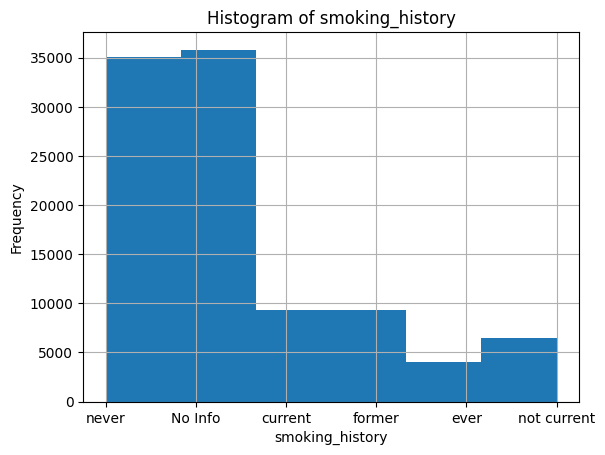

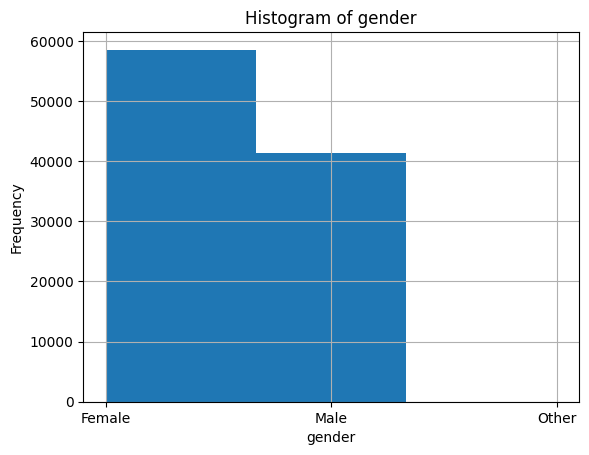

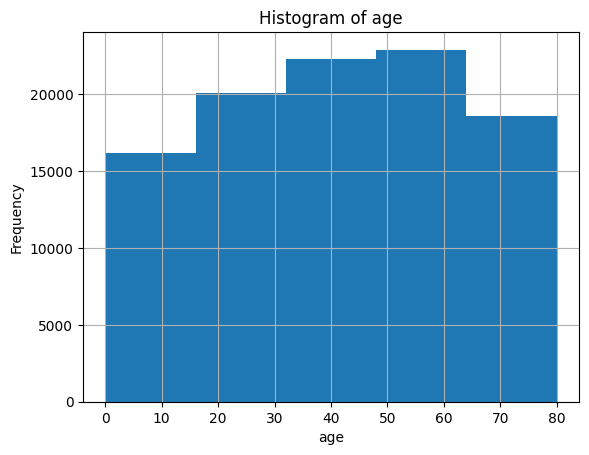

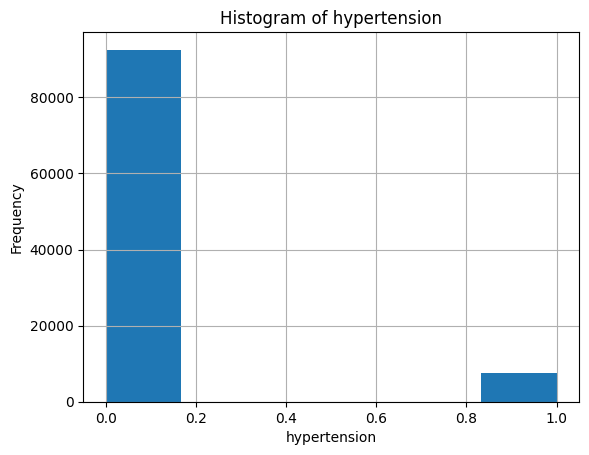

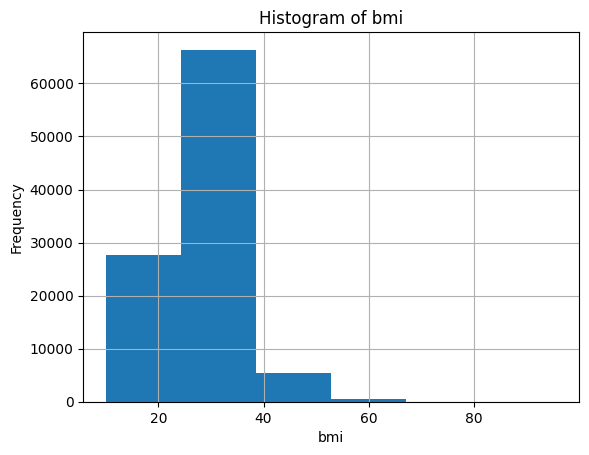

In [16]:
 import matplotlib.pyplot as plt
 df['smoking_history'].hist(bins=6) # Replace 'column_name' with the actual column name
 plt.xlabel('smoking_history')
 plt.ylabel('Frequency')
 plt.title('Histogram of smoking_history')
 plt.show()

 df['gender'].hist(bins=3) # Replace 'column_name' with the actual column name
 plt.xlabel('gender')
 plt.ylabel('Frequency')
 plt.title('Histogram of gender')
 plt.show()

 df['age'].hist(bins=5) # Replace 'column_name' with the actual column name
 plt.xlabel('age')
 plt.ylabel('Frequency')
 plt.title('Histogram of age')
 plt.show()

 df['hypertension'].hist(bins=6) # Replace 'column_name' with the actual column name
 plt.xlabel('hypertension')
 plt.ylabel('Frequency')
 plt.title('Histogram of hypertension')
 plt.show()


 df['bmi'].hist(bins=6) # Replace 'column_name' with the actual column name
 plt.xlabel('bmi')
 plt.ylabel('Frequency')
 plt.title('Histogram of bmi')
 plt.show()

In [17]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [18]:
# here we have 2 categorical values rest are numeric
#assign gender with numerical values
df['gender'] = df['gender'].map({'Female':0, 'Male':1, 'Other':2})

In [19]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [20]:
df['gender'].unique()

array([0, 1, 2])

In [21]:
df['smoking_history'] = df['smoking_history'].map({'never':0, 'No Info':0, 'current':2, 'former':2, 'ever':2, 'not current':2})

In [22]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [23]:
# Remove outliers in Age attribute
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
# Age has to be aboye 30 to take out Type 1 patients
df = df[df['age'] >= 30]


In [25]:
df['age'].unique()

array([80., 54., 36., 76., 44., 79., 42., 32., 53., 78., 67., 37., 40.,
       69., 72., 30., 45., 43., 50., 41., 34., 73., 77., 66., 60., 38.,
       57., 74., 46., 59., 56., 55., 62., 47., 68., 75., 58., 33., 61.,
       31., 49., 39., 65., 70., 48., 51., 71., 64., 63., 52., 35.])

In [26]:
df['bmi'].unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

In [27]:
df = df[df['bmi'] > 12]
df = df[df['bmi'] < 50]


In [28]:
df['HbA1c_level'].unique()

array([6.6, 5. , 4.8, 6.5, 5.7, 6.1, 5.8, 3.5, 6. , 4. , 6.2, 9. , 7. ,
       8.2, 4.5, 7.5, 6.8, 8.8])

In [29]:
# Step 4: Split the Data into Features and Target Variable
X = df.drop('diabetes', axis=1)  # Features (all columns except 'Outcome')
y = df['diabetes']  # Target variable (Outcome column)

In [30]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Step 5: Feature Scaling
# Logistic Regression performs better when data is normalized or standardized
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[11619   166]
 [  569  1023]]

Accuracy Score:  0.945054945054945

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     11785
           1       0.86      0.64      0.74      1592

    accuracy                           0.95     13377
   macro avg       0.91      0.81      0.85     13377
weighted avg       0.94      0.95      0.94     13377



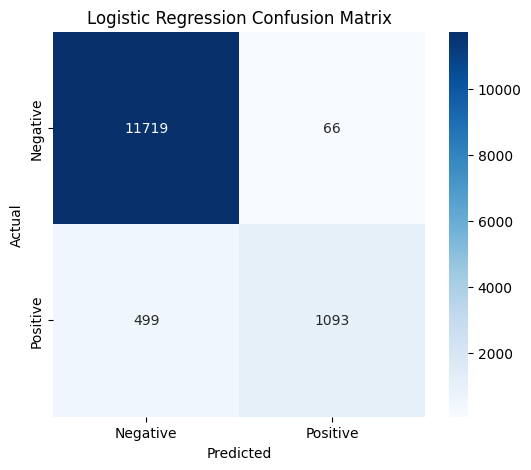

In [43]:

# Optional: Plot a confusion matrix (for better visualization)
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [33]:
from sklearn.naive_bayes import GaussianNB
# Create the Naive Bayes classifier model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Naive Bayes Model: {accuracy * 100:.2f}%')

# Optionally, print the confusion matrix and other classification metrics
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Naive Bayes Model: 89.47%

Confusion Matrix:
[[10927   858]
 [  551  1041]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11785
           1       0.55      0.65      0.60      1592

    accuracy                           0.89     13377
   macro avg       0.75      0.79      0.77     13377
weighted avg       0.90      0.89      0.90     13377



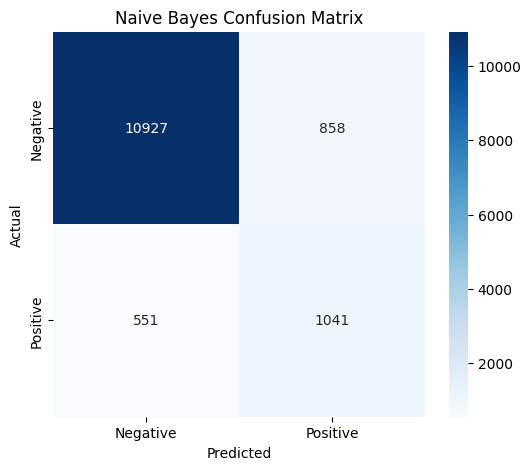

In [34]:
# Optional: Plot a confusion matrix (for better visualization)
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

Accuracy Score:  0.9313747477012783

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     11785
           1       0.70      0.74      0.72      1592

    accuracy                           0.93     13377
   macro avg       0.83      0.85      0.84     13377
weighted avg       0.93      0.93      0.93     13377


Confusion Matrix:
 [[11282   503]
 [  415  1177]]


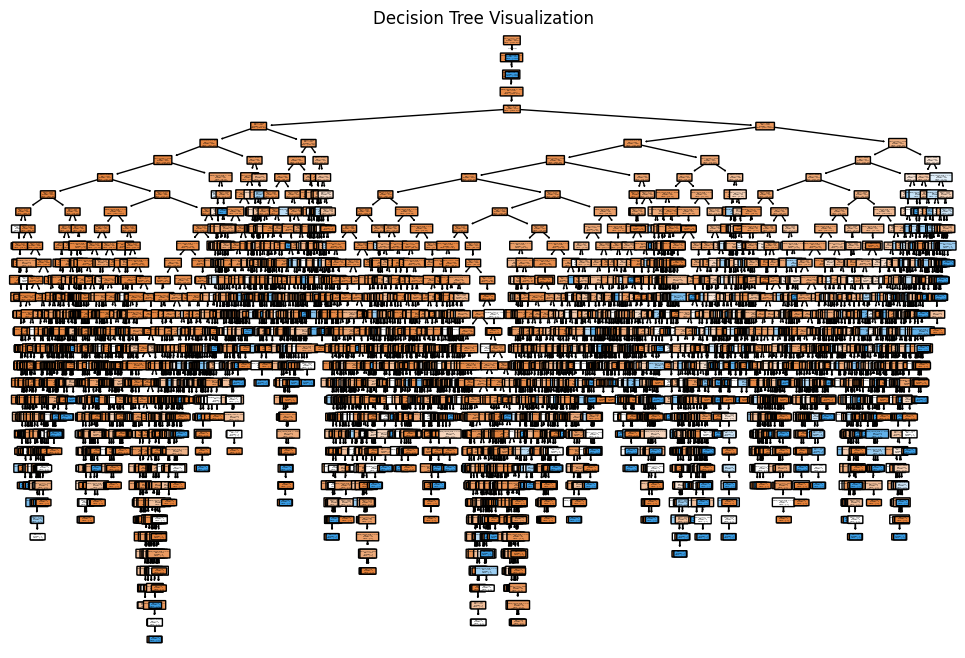

In [35]:
# Step 5: Train the Decision Tree Model
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 7: Evaluate the Model
# Accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Plot the Decision Tree (to visualize the decision-making process)
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

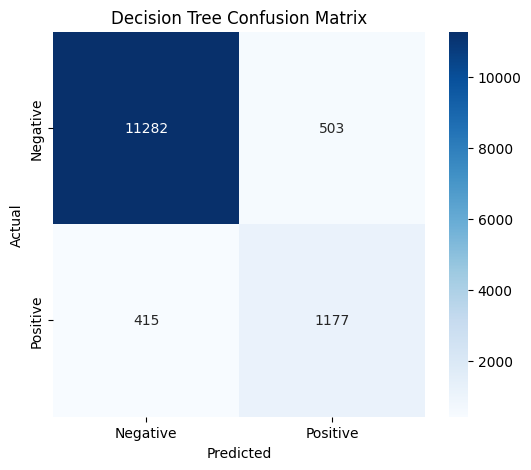

In [36]:
# Optional: Plot a confusion matrix (for better visualization)
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Accuracy Score:  0.9577633251102639

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     11785
           1       0.94      0.69      0.79      1592

    accuracy                           0.96     13377
   macro avg       0.95      0.84      0.89     13377
weighted avg       0.96      0.96      0.95     13377


Confusion Matrix:
 [[11719    66]
 [  499  1093]]


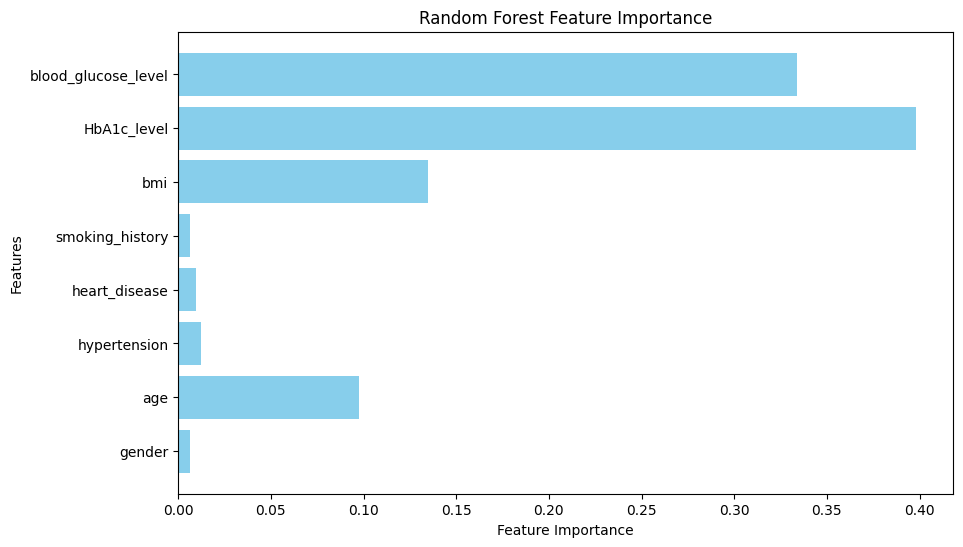

In [37]:
# Step 5: Train the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the Model
# Accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Random Forest are too complex to visualize so its mentioned to see the importance instead of plotting the tree
# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

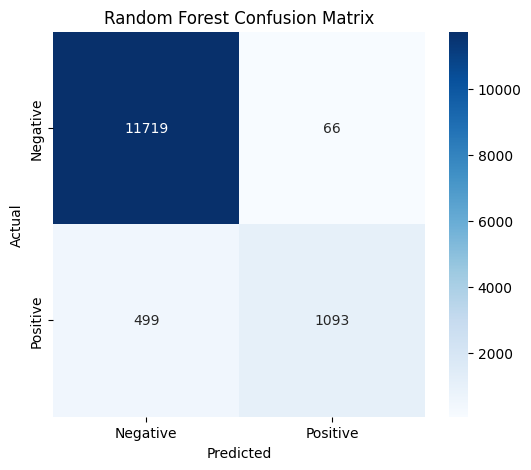

In [42]:
# Optional: Plot a confusion matrix (for better visualization)
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [39]:
# Example model variable names from your notebook
lr_model = LogisticRegression()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

lr_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

models = {
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}


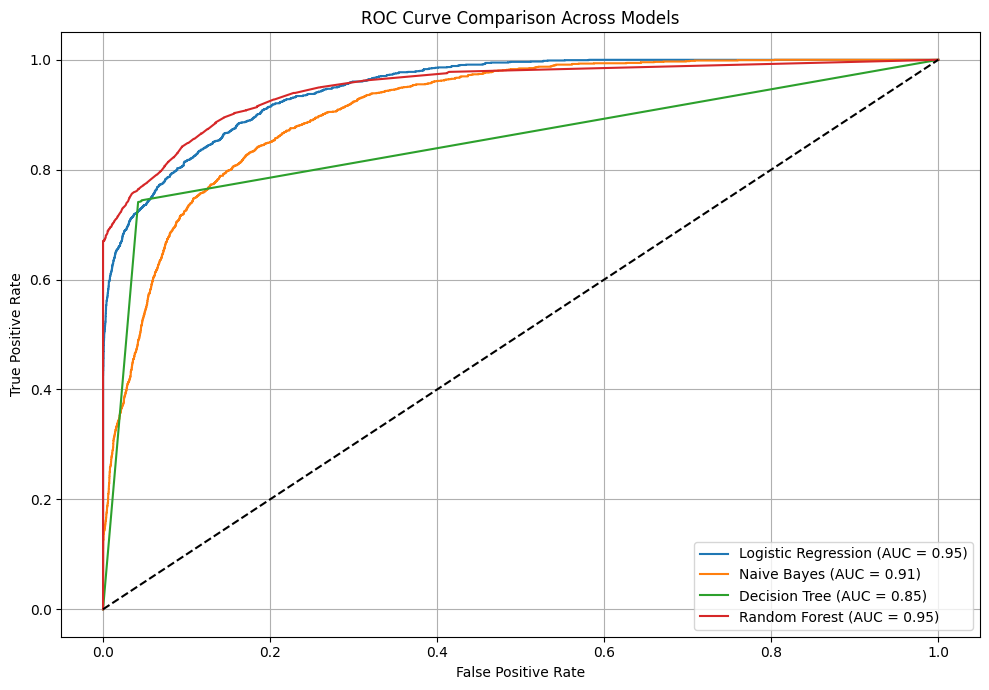

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Assume these are your trained models and test set
models = {
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

# Plot setup
plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get probability scores for class 1 (diabetic)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)  # for models like SVM

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot each model's ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
